# Grouping of customers by energy consumption

I will perform a clustering of customers based on energy consumption to discover possible patterns.

In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

## Exploratory Data Analyses

In [2]:
# Reading the dataset

data = pd.read_csv(r'..\data\consumo_energia.csv', delimiter = ';')

In [3]:
dataframe = pd.DataFrame(data)

In [4]:
# Dataset dimesions
dataframe.shape

(2075259, 9)

In [5]:
# General info
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [6]:
# First five rows
dataframe.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [7]:
# Last five rows
dataframe.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [8]:
# Data Type
dataframe.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [9]:
# Checking missing values
print(dataframe.isnull().sum())

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64


In [10]:
# The first two columns won't be used
dataset  = dataframe.iloc[0: , 2:9].dropna()

In [11]:
# Changing column type
cols_to_convert = [
    'Voltage',
    'Global_active_power',
    'Global_reactive_power',
    'Global_intensity',
    'Sub_metering_1',
    'Sub_metering_2',
    'Sub_metering_3'
]

dataset[cols_to_convert] = dataset[cols_to_convert].astype('float64')

In [12]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [13]:
# Checking missing values
print(dataset.isnull().any())

Global_active_power      False
Global_reactive_power    False
Voltage                  False
Global_intensity         False
Sub_metering_1           False
Sub_metering_2           False
Sub_metering_3           False
dtype: bool


In [14]:
# Variables attributes
df_attributes = dataset.values

In [15]:
# Dataset values
df_attributes

array([[  4.216,   0.418, 234.84 , ...,   0.   ,   1.   ,  17.   ],
       [  5.36 ,   0.436, 233.63 , ...,   0.   ,   1.   ,  16.   ],
       [  5.374,   0.498, 233.29 , ...,   0.   ,   2.   ,  17.   ],
       ...,
       [  0.938,   0.   , 239.82 , ...,   0.   ,   0.   ,   0.   ],
       [  0.934,   0.   , 239.7  , ...,   0.   ,   0.   ,   0.   ],
       [  0.932,   0.   , 239.55 , ...,   0.   ,   0.   ,   0.   ]],
      shape=(2049280, 7))

In [16]:
# model train size
sample_one, sample_two = train_test_split(df_attributes, train_size= .01)

In [17]:
# Sample dimensions
sample_one.shape

(20492, 7)

In [18]:
# Dimension reduction by PCA
pca = PCA(n_components = 2).fit_transform(sample_one)

In [19]:
#Range for K
k_range = range(1, 12)

In [20]:
# Fits KMeans models for each 'k' in 'k_range' to 'pca' data.
K_Means = [KMeans(n_clusters = k).fit(pca) for k in k_range]

In [21]:
# Finding centroids of the clusters.
centroids = [C.cluster_centers_ for C in K_Means]

In [22]:
# Calculates Euclidean distances from data points ('pca') to all centroids for each 'k'.
euclid_dist = [cdist(pca, centroid, 'euclidean') for centroid in centroids]
# Finds the minimum distance for each data point to its closest centroid per 'k'.
dist = [np.min(i, axis = 1) for i in euclid_dist]

In [23]:
# Distances within each cluster
intra_sum = [sum( d ** 2) for d in dist]
# Total sum of squared pairwise distances (normalized)
total_sum = np.sum(pdist(pca) ** 2) / pca.shape[0]
# Inter-cluster distance sum
inter_sum = total_sum - intra_sum

Elbow plots are used in the KMeans algorithm to help choose the optimal number of clusters (k). They show how the within-cluster variance (inertia) decreases as k increases. Initially, adding more clusters greatly reduces this variance, but after a certain point (the "elbow"), the improvement becomes marginal. This point suggests a good balance between model simplicity and accuracy — the optimal k.

Text(0.5, 1.0, 'Explained Variance x K Value')

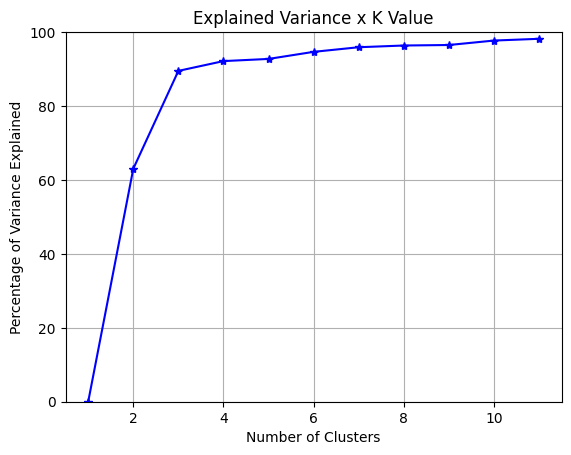

In [24]:
# Elbow plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, inter_sum/total_sum * 100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('Percentage of Variance Explained')
plt.title('Explained Variance x K Value')

In [25]:
first_model = KMeans(n_clusters = 8)
first_model.fit(pca)

,n_clusters,8
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [26]:
# Define the x-axis limits based on the first principal component
x_min, x_max = pca[:, 0].min() - 5, pca[:, 0].max() - 1

# Define the y-axis limits based on the second principal component
y_min, y_max = pca[:, 1].min() + 1, pca[:, 1].max() + 5

# Create a mesh grid of points covering the PCA-reduced 2D space
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the cluster label for each point in the grid using the trained model
Z = first_model.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the prediction results to match the shape of the mesh grid
Z = Z.reshape(xx.shape)


In [27]:
Z

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [3, 3, 3, ..., 2, 2, 2],
       [3, 3, 3, ..., 2, 2, 2],
       [3, 3, 3, ..., 2, 2, 2]], shape=(4225, 2838), dtype=int32)

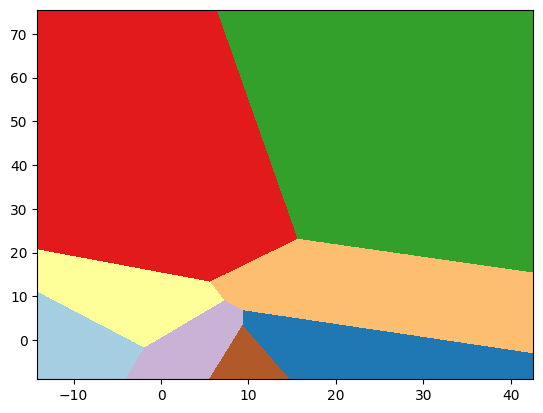

In [28]:
# Create a new figure for the plot
plt.figure()

# Clear the current figure (optional but ensures a clean slate)
plt.clf()

# Display the predicted cluster regions as an image
plt.imshow(
    Z,  # Matrix of predicted labels reshaped to match the grid
    interpolation='nearest',  # No smoothing between grid cells
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),  # Define the spatial extent of the image
    cmap=plt.cm.Paired,  # Use a predefined colormap to distinguish clusters
    aspect='auto',  # Automatically adjust the aspect ratio
    origin='lower'  # Set the origin to the bottom-left corner
)

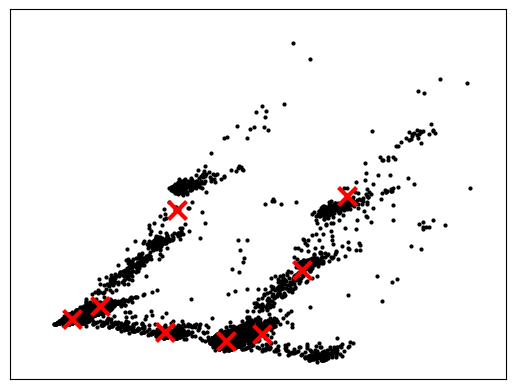

In [29]:
# Plot the PCA-reduced data points as small black dots
plt.plot(pca[:, 0], pca[:, 1], 'k.', markersize=4)

# Get the coordinates of the cluster centers from the model
centroids = first_model.cluster_centers_

# Get the model's inertia (total distance from points to their cluster centers)
inert = first_model.inertia_

# Plot the cluster centers as big red Xs
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='r', zorder=8)

# Set the visible range for the x-axis and y-axis
plt.xlim(x_min, x_max)
plt.ylim(x_min, y_max)

# Remove tick labels from the axes for a cleaner look
plt.xticks(())
plt.yticks(())

# Display the final plot
plt.show()

In [30]:
# Get the cluster labels assigned to each point by the model
labels = first_model.labels_

# Calculate the silhouette score (how well-separated the clusters are),
# using Euclidean distance, and convert it to a percentage
silhouette_score(pca, labels, metric='euclidean') * 100

67.690217891308

In [31]:
# Create a new KMeans model to find 10 clusters
second_model = KMeans(n_clusters=10)

# Train (fit) the model using the PCA-reduced data
second_model.fit(pca)

,n_clusters,10
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [32]:
# Set the min and max values for the x-axis (with padding for better visualization)
x_min, x_max = pca[:, 0].min() - 5, pca[:, 0].max() - 1

# Set the min and max values for the y-axis (also with padding)
y_min, y_max = pca[:, 1].min() + 1, pca[:, 1].max() + 5

# Create a grid of x and y values to use for plotting decision boundaries
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), 
                     np.arange(y_min, y_max, 0.02))

# Use the trained model to predict cluster labels for each point in the grid
Z = second_model.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predicted labels to match the shape of the grid for plotting
Z = Z.reshape(xx.shape)

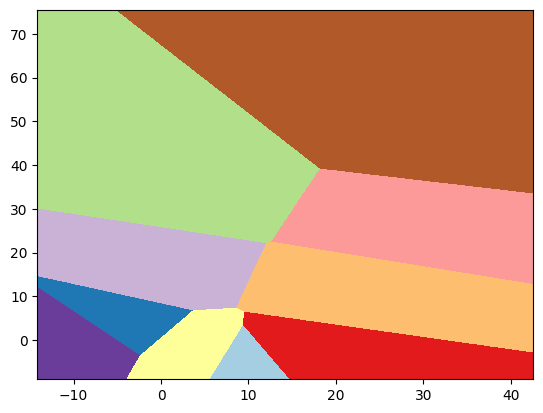

In [33]:
# Create a new figure (figure number 1)
plt.figure(1)

# Clear the current figure (in case anything was drawn before)
plt.clf()

# Display the predicted cluster regions (Z) as a colored background image
plt.imshow(
    Z,
    interpolation='nearest',  # No smoothing between pixels
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),  # Define the area covered
    cmap=plt.cm.Paired,       # Use a predefined color map with paired colors
    aspect='auto',            # Adjust aspect ratio automatically
    origin='lower'            # Set the origin (0,0) to be in the lower-left corner
)


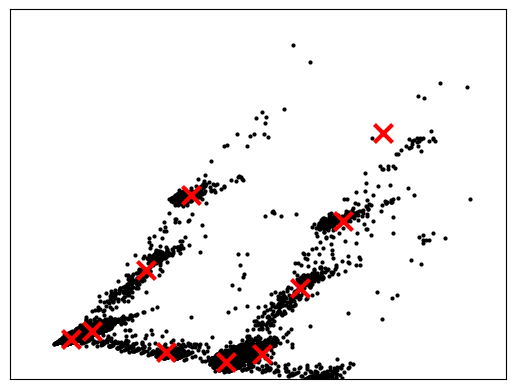

In [34]:
# Plot the PCA-reduced data points as small black dots
plt.plot(pca[:, 0], pca[:, 1], 'k.', markersize=4)

# Get the cluster centers from the second KMeans model
centroids = second_model.cluster_centers_

# Get the inertia (how tightly the points are clustered around the centroids)
inert = second_model.inertia_

# Plot the centroids as large red Xs
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3, color='r', zorder=8)

# Set the x and y axis limits for the plot
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Remove tick labels from both axes for a cleaner look
plt.xticks(())
plt.yticks(())

# Show the final plot
plt.show()

In [35]:
# Get the cluster labels assigned to each data point by the second model
labels = second_model.labels_

# Calculate the silhouette score to measure how well the clusters are separated,
silhouette_score(pca, labels, metric='euclidean')

0.6318242465618478

In [39]:
names = ['Global_active_power', 
         'Global_reactive_power', 
         'Voltage', 
         'Global_intensity', 
         'Sub_metering_1', 
         'Sub_metering_2', 
         'Sub_metering_3']

In [ ]:
# Creating the cluster map
cluster_map = pd.DataFrame(sample_one, columns = names)
cluster_map['Global_active_power'] = pd.to_numeric(cluster_map['Global_active_power'])
cluster_map['cluster'] = first_model.labels_

In [42]:
cluster_map

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,cluster
0,4.268,0.000,237.98,17.8,0.0,42.0,17.0,4
1,0.218,0.000,247.67,0.8,0.0,0.0,0.0,0
2,0.412,0.300,238.20,2.2,0.0,1.0,1.0,0
3,0.424,0.062,242.82,2.0,0.0,0.0,0.0,0
4,0.488,0.178,235.83,2.2,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...
20487,0.356,0.070,242.53,1.4,0.0,0.0,1.0,0
20488,0.708,0.054,235.08,3.0,0.0,0.0,0.0,0
20489,1.768,0.348,241.07,7.6,0.0,0.0,10.0,5
20490,2.582,0.098,237.93,10.8,38.0,0.0,0.0,3


In [45]:
# Mean of the clusters per global active power
cluster_map.groupby('cluster')['Global_active_power'].mean()

cluster
0    0.397553
1    2.984764
2    4.749637
3    3.141769
4    3.834702
5    1.100693
6    1.821352
7    1.613405
Name: Global_active_power, dtype: float64

In [47]:
# Amount of the clusters per global active power
cluster_map.groupby('cluster')['Global_active_power'].count()

cluster
0    11715
1     1008
2      342
3      320
4      282
5      433
6     1155
7     5237
Name: Global_active_power, dtype: int64

In [53]:
# Generating the clusters with the normalized data

data_set_att = dataset.values

from sklearn.preprocessing import MinMaxScaler

standardizer = MinMaxScaler()
data_set_att = standardizer.fit_transform(data_set_att)
sample1, sample2 = train_test_split(data_set_att, train_size= .01)
pca = PCA(n_components=2).fit_transform(sample1)
k_range = range(1,12)
k_means_init = [KMeans(n_clusters=k).fit(pca) for k in k_range]
centroids=[X.cluster_centers_ for X in k_means_init]
k_euclidean = [cdist(pca,cent,'euclidean') for cent in centroids]